In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

2024-05-27 21:23:45.697610: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-05-27 21:23:48.361925: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 21:23:48.365026: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-05-27 21:23:48.890428: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-05-27 21:23:48.892890: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'
CAPATH='/raid/mpsych/CACTAS/DATA/CA24'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
masks = C.Helper.load_seg_data(CAPATH)

In [7]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.split_patients_masks(images, labels, masks)

In [8]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.normalization2(DATAPATH, CAPATH, X_train, y_train, m_train, X_test, y_test, m_test)

In [9]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key(y_train)

In [10]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13430, 512, 512, 1) (13430, 512, 512, 1) (3336, 512, 512, 1) (3336, 512, 512, 1)


In [11]:
y_test = y_test.astype(np.float64)

In [12]:
m_train, m_test = C.Helper.extract_masks_slices(m_train, m_test)

(13430, 512, 512, 1) (3336, 512, 512, 1)


In [13]:
X_train, y_train, m_train = C.Helper.filter_slices(X_train, y_train, m_train)

(572, 512, 512, 1) (572, 512, 512, 1) (572, 512, 512, 1)


In [14]:
train_images_array, test_images_array = C.Helper.masked_image(X_train, m_train, X_test, m_test)

(572, 512, 512, 1) (3336, 512, 512, 1)


In [15]:
X_train_set = train_images_array[:last_key]
y_train_set = y_train[:last_key]
X_val = train_images_array[last_key:]
y_val = y_train[last_key:]

In [16]:
X_train_set = X_train_set.astype(np.float64)
X_val = X_val.astype(np.float64)

In [17]:
train_gen = C.Helper.augment(X_train_set, y_train_set)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [18]:
model = C.Helper.create_swinUNet(X_train_set[0].shape)

2024-05-27 21:27:18.063721: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-05-27 21:27:18.066199: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-05-27 21:27:18.075783: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2024-05-27 21:27:18.078733: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-05-27 21:27:18.081152: I tensorflow/core

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [19]:
model, history = C.Helper.train_swinUNet(train_gen, X_train_set, y_train_set, X_val, y_val, model, epochs=500)

2024-05-27 21:27:22.131769: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-05-27 21:27:22.150766: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245740000 Hz


Epoch 1/500


2024-05-27 21:27:47.401744: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-05-27 21:27:48.494697: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-05-27 21:27:48.495052: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-05-27 21:27:48.634237: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-05-27 21:27:49.491482: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2024-05-27 21:27:50.680121: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2024-05-27 21:27:50.680143: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-05-27 21:27:50.68063

27/27 [==============================] - 65s 1s/step - loss: 0.0908 - iou: 0.0013 - iou_thresholded: 0.0015 - val_loss: 0.0036 - val_iou: 0.0022 - val_iou_thresholded: 0.0021
Epoch 2/500
27/27 [==============================] - 31s 1s/step - loss: 0.0027 - iou: 0.0033 - iou_thresholded: 0.0030 - val_loss: 0.0032 - val_iou: 0.0048 - val_iou_thresholded: 0.0035
Epoch 3/500
27/27 [==============================] - 30s 1s/step - loss: 0.0017 - iou: 0.0077 - iou_thresholded: 0.0044 - val_loss: 0.0015 - val_iou: 0.0069 - val_iou_thresholded: 0.0022
Epoch 4/500
27/27 [==============================] - 30s 1s/step - loss: 0.0011 - iou: 0.0092 - iou_thresholded: 0.0020 - val_loss: 0.0011 - val_iou: 0.0142 - val_iou_thresholded: 0.0021
Epoch 5/500
27/27 [==============================] - 30s 1s/step - loss: 0.0011 - iou: 0.0109 - iou_thresholded: 0.0024 - val_loss: 0.0016 - val_iou: 0.0035 - val_iou_thresholded: 0.0021
Epoch 6/500
27/27 [==============================] - 30s 1s/step - loss: 0.00

27/27 [==============================] - 30s 1s/step - loss: 5.2777e-04 - iou: 0.1615 - iou_thresholded: 0.2328 - val_loss: 7.2643e-04 - val_iou: 0.1538 - val_iou_thresholded: 0.1477
Epoch 44/500
27/27 [==============================] - 31s 1s/step - loss: 5.9151e-04 - iou: 0.1513 - iou_thresholded: 0.2135 - val_loss: 6.2731e-04 - val_iou: 0.1759 - val_iou_thresholded: 0.2610
Epoch 45/500
27/27 [==============================] - 31s 1s/step - loss: 5.7460e-04 - iou: 0.1525 - iou_thresholded: 0.2144 - val_loss: 5.8981e-04 - val_iou: 0.1981 - val_iou_thresholded: 0.2446
Epoch 46/500
27/27 [==============================] - 31s 1s/step - loss: 5.3246e-04 - iou: 0.1696 - iou_thresholded: 0.2358 - val_loss: 6.0105e-04 - val_iou: 0.2055 - val_iou_thresholded: 0.2512
Epoch 47/500
27/27 [==============================] - 30s 1s/step - loss: 5.4620e-04 - iou: 0.1606 - iou_thresholded: 0.2235 - val_loss: 6.4235e-04 - val_iou: 0.1815 - val_iou_thresholded: 0.2209
Epoch 48/500
27/27 [=============

Epoch 85/500
27/27 [==============================] - 31s 1s/step - loss: 4.6335e-04 - iou: 0.2163 - iou_thresholded: 0.3012 - val_loss: 5.3907e-04 - val_iou: 0.2311 - val_iou_thresholded: 0.3501
Epoch 86/500
27/27 [==============================] - 31s 1s/step - loss: 4.4821e-04 - iou: 0.2167 - iou_thresholded: 0.3083 - val_loss: 5.2505e-04 - val_iou: 0.2181 - val_iou_thresholded: 0.2657
Epoch 87/500
27/27 [==============================] - 30s 1s/step - loss: 4.4579e-04 - iou: 0.2302 - iou_thresholded: 0.3248 - val_loss: 5.2351e-04 - val_iou: 0.2286 - val_iou_thresholded: 0.3483
Epoch 88/500
27/27 [==============================] - 31s 1s/step - loss: 4.6117e-04 - iou: 0.2034 - iou_thresholded: 0.2838 - val_loss: 5.1966e-04 - val_iou: 0.2340 - val_iou_thresholded: 0.3487
Epoch 89/500
27/27 [==============================] - 31s 1s/step - loss: 4.4544e-04 - iou: 0.2168 - iou_thresholded: 0.3089 - val_loss: 5.7714e-04 - val_iou: 0.2046 - val_iou_thresholded: 0.2815
Epoch 90/500
27/27 [

Epoch 127/500
27/27 [==============================] - 30s 1s/step - loss: 3.8958e-04 - iou: 0.3029 - iou_thresholded: 0.4094 - val_loss: 4.3655e-04 - val_iou: 0.3067 - val_iou_thresholded: 0.4364
Epoch 128/500
27/27 [==============================] - 30s 1s/step - loss: 3.7185e-04 - iou: 0.3107 - iou_thresholded: 0.4267 - val_loss: 4.2629e-04 - val_iou: 0.3317 - val_iou_thresholded: 0.4925
Epoch 129/500
27/27 [==============================] - 30s 1s/step - loss: 4.0906e-04 - iou: 0.2842 - iou_thresholded: 0.3763 - val_loss: 5.0002e-04 - val_iou: 0.2917 - val_iou_thresholded: 0.4584
Epoch 130/500
27/27 [==============================] - 30s 1s/step - loss: 3.4257e-04 - iou: 0.3325 - iou_thresholded: 0.4534 - val_loss: 6.3772e-04 - val_iou: 0.2640 - val_iou_thresholded: 0.3923
Epoch 131/500
27/27 [==============================] - 31s 1s/step - loss: 3.5594e-04 - iou: 0.3031 - iou_thresholded: 0.4099 - val_loss: 4.6406e-04 - val_iou: 0.3204 - val_iou_thresholded: 0.4567
Epoch 132/500
2

27/27 [==============================] - 30s 1s/step - loss: 3.1172e-04 - iou: 0.3611 - iou_thresholded: 0.4729 - val_loss: 4.2974e-04 - val_iou: 0.3210 - val_iou_thresholded: 0.4970
Epoch 169/500
27/27 [==============================] - 31s 1s/step - loss: 3.3483e-04 - iou: 0.3419 - iou_thresholded: 0.4552 - val_loss: 4.1689e-04 - val_iou: 0.3455 - val_iou_thresholded: 0.4274
Epoch 170/500
27/27 [==============================] - 31s 1s/step - loss: 3.2822e-04 - iou: 0.3529 - iou_thresholded: 0.4655 - val_loss: 3.5254e-04 - val_iou: 0.3884 - val_iou_thresholded: 0.5616
Epoch 171/500
27/27 [==============================] - 30s 1s/step - loss: 3.4529e-04 - iou: 0.3290 - iou_thresholded: 0.4408 - val_loss: 4.8382e-04 - val_iou: 0.3248 - val_iou_thresholded: 0.4118
Epoch 172/500
27/27 [==============================] - 31s 1s/step - loss: 3.5389e-04 - iou: 0.3240 - iou_thresholded: 0.4321 - val_loss: 4.5383e-04 - val_iou: 0.3193 - val_iou_thresholded: 0.4376
Epoch 173/500
27/27 [========

Epoch 210/500
27/27 [==============================] - 30s 1s/step - loss: 3.1224e-04 - iou: 0.3669 - iou_thresholded: 0.4860 - val_loss: 4.0469e-04 - val_iou: 0.3273 - val_iou_thresholded: 0.4118
Epoch 211/500
27/27 [==============================] - 30s 1s/step - loss: 2.9373e-04 - iou: 0.3871 - iou_thresholded: 0.5126 - val_loss: 3.4957e-04 - val_iou: 0.3569 - val_iou_thresholded: 0.4673
Epoch 212/500
27/27 [==============================] - 31s 1s/step - loss: 3.3170e-04 - iou: 0.3510 - iou_thresholded: 0.4622 - val_loss: 3.4044e-04 - val_iou: 0.3711 - val_iou_thresholded: 0.5988
Epoch 213/500
27/27 [==============================] - 31s 1s/step - loss: 3.0499e-04 - iou: 0.3696 - iou_thresholded: 0.4910 - val_loss: 4.2532e-04 - val_iou: 0.3367 - val_iou_thresholded: 0.4182
Epoch 214/500
27/27 [==============================] - 31s 1s/step - loss: 3.1417e-04 - iou: 0.3704 - iou_thresholded: 0.4884 - val_loss: 3.7185e-04 - val_iou: 0.3510 - val_iou_thresholded: 0.4427
Epoch 215/500
2

27/27 [==============================] - 31s 1s/step - loss: 2.9119e-04 - iou: 0.3864 - iou_thresholded: 0.5086 - val_loss: 3.7968e-04 - val_iou: 0.3681 - val_iou_thresholded: 0.4978
Epoch 252/500
27/27 [==============================] - 30s 1s/step - loss: 3.0095e-04 - iou: 0.3806 - iou_thresholded: 0.4974 - val_loss: 4.8286e-04 - val_iou: 0.3095 - val_iou_thresholded: 0.4233
Epoch 253/500
27/27 [==============================] - 31s 1s/step - loss: 2.8911e-04 - iou: 0.3832 - iou_thresholded: 0.5030 - val_loss: 3.5017e-04 - val_iou: 0.3769 - val_iou_thresholded: 0.5440
Epoch 254/500
27/27 [==============================] - 32s 1s/step - loss: 3.1556e-04 - iou: 0.3677 - iou_thresholded: 0.4807 - val_loss: 3.4402e-04 - val_iou: 0.3878 - val_iou_thresholded: 0.4947
Epoch 255/500
27/27 [==============================] - 30s 1s/step - loss: 3.0874e-04 - iou: 0.3605 - iou_thresholded: 0.4728 - val_loss: 4.0259e-04 - val_iou: 0.3660 - val_iou_thresholded: 0.5129
Epoch 256/500
27/27 [========

Epoch 293/500
27/27 [==============================] - 30s 1s/step - loss: 3.8267e-04 - iou: 0.2985 - iou_thresholded: 0.4090 - val_loss: 3.2103e-04 - val_iou: 0.4472 - val_iou_thresholded: 0.5906
Epoch 294/500
27/27 [==============================] - 31s 1s/step - loss: 3.1944e-04 - iou: 0.3685 - iou_thresholded: 0.4856 - val_loss: 3.8294e-04 - val_iou: 0.3392 - val_iou_thresholded: 0.4645
Epoch 295/500
27/27 [==============================] - 30s 1s/step - loss: 3.2502e-04 - iou: 0.3775 - iou_thresholded: 0.5053 - val_loss: 3.4151e-04 - val_iou: 0.3716 - val_iou_thresholded: 0.5005
Epoch 296/500
27/27 [==============================] - 31s 1s/step - loss: 3.0803e-04 - iou: 0.3776 - iou_thresholded: 0.4994 - val_loss: 3.3304e-04 - val_iou: 0.3762 - val_iou_thresholded: 0.5220
Epoch 297/500
27/27 [==============================] - 30s 1s/step - loss: 3.3659e-04 - iou: 0.3691 - iou_thresholded: 0.4925 - val_loss: 3.2713e-04 - val_iou: 0.4049 - val_iou_thresholded: 0.6004
Epoch 298/500
2

27/27 [==============================] - 31s 1s/step - loss: 2.8767e-04 - iou: 0.3915 - iou_thresholded: 0.5107 - val_loss: 3.9899e-04 - val_iou: 0.3562 - val_iou_thresholded: 0.4843
Epoch 335/500
27/27 [==============================] - 30s 1s/step - loss: 3.4373e-04 - iou: 0.3489 - iou_thresholded: 0.4665 - val_loss: 3.1996e-04 - val_iou: 0.4046 - val_iou_thresholded: 0.6095
Epoch 336/500
27/27 [==============================] - 31s 1s/step - loss: 2.9216e-04 - iou: 0.3890 - iou_thresholded: 0.5031 - val_loss: 3.9454e-04 - val_iou: 0.3523 - val_iou_thresholded: 0.5270
Epoch 337/500
27/27 [==============================] - 31s 1s/step - loss: 3.1518e-04 - iou: 0.3715 - iou_thresholded: 0.4878 - val_loss: 2.9026e-04 - val_iou: 0.4042 - val_iou_thresholded: 0.6092
Epoch 338/500
27/27 [==============================] - 31s 1s/step - loss: 3.2445e-04 - iou: 0.3684 - iou_thresholded: 0.4872 - val_loss: 4.1829e-04 - val_iou: 0.3336 - val_iou_thresholded: 0.4937
Epoch 339/500
27/27 [========

Epoch 376/500
27/27 [==============================] - 30s 1s/step - loss: 3.2012e-04 - iou: 0.3674 - iou_thresholded: 0.4807 - val_loss: 3.3318e-04 - val_iou: 0.3817 - val_iou_thresholded: 0.5715
Epoch 377/500
27/27 [==============================] - 30s 1s/step - loss: 2.9278e-04 - iou: 0.3941 - iou_thresholded: 0.5181 - val_loss: 5.3537e-04 - val_iou: 0.2992 - val_iou_thresholded: 0.3900
Epoch 378/500
27/27 [==============================] - 31s 1s/step - loss: 2.7309e-04 - iou: 0.4037 - iou_thresholded: 0.5332 - val_loss: 3.4284e-04 - val_iou: 0.4210 - val_iou_thresholded: 0.5681
Epoch 379/500
27/27 [==============================] - 31s 1s/step - loss: 3.2501e-04 - iou: 0.3948 - iou_thresholded: 0.5112 - val_loss: 3.0225e-04 - val_iou: 0.4568 - val_iou_thresholded: 0.5641
Epoch 380/500
27/27 [==============================] - 31s 1s/step - loss: 2.5614e-04 - iou: 0.4179 - iou_thresholded: 0.5359 - val_loss: 2.9633e-04 - val_iou: 0.4353 - val_iou_thresholded: 0.5530
Epoch 381/500
2

27/27 [==============================] - 30s 1s/step - loss: 3.2279e-04 - iou: 0.3906 - iou_thresholded: 0.5161 - val_loss: 3.7416e-04 - val_iou: 0.3304 - val_iou_thresholded: 0.4354
Epoch 418/500
27/27 [==============================] - 31s 1s/step - loss: 2.7403e-04 - iou: 0.4125 - iou_thresholded: 0.5305 - val_loss: 3.0262e-04 - val_iou: 0.4120 - val_iou_thresholded: 0.5145
Epoch 419/500
27/27 [==============================] - 30s 1s/step - loss: 2.8325e-04 - iou: 0.3947 - iou_thresholded: 0.5201 - val_loss: 3.7044e-04 - val_iou: 0.3686 - val_iou_thresholded: 0.4387
Epoch 420/500
27/27 [==============================] - 30s 1s/step - loss: 2.9880e-04 - iou: 0.3773 - iou_thresholded: 0.4853 - val_loss: 2.9353e-04 - val_iou: 0.4373 - val_iou_thresholded: 0.5917
Epoch 421/500
27/27 [==============================] - 31s 1s/step - loss: 3.2855e-04 - iou: 0.3722 - iou_thresholded: 0.4953 - val_loss: 3.3582e-04 - val_iou: 0.3802 - val_iou_thresholded: 0.5211
Epoch 422/500
27/27 [========

Epoch 459/500
27/27 [==============================] - 30s 1s/step - loss: 2.6269e-04 - iou: 0.4235 - iou_thresholded: 0.5423 - val_loss: 2.7397e-04 - val_iou: 0.4616 - val_iou_thresholded: 0.5954
Epoch 460/500
27/27 [==============================] - 30s 1s/step - loss: 2.7416e-04 - iou: 0.4098 - iou_thresholded: 0.5385 - val_loss: 2.7515e-04 - val_iou: 0.4629 - val_iou_thresholded: 0.5879
Epoch 461/500
27/27 [==============================] - 31s 1s/step - loss: 4.6927e-04 - iou: 0.2720 - iou_thresholded: 0.3526 - val_loss: 5.1117e-04 - val_iou: 0.2442 - val_iou_thresholded: 0.4074
Epoch 462/500
27/27 [==============================] - 31s 1s/step - loss: 5.0341e-04 - iou: 0.2585 - iou_thresholded: 0.3673 - val_loss: 3.4248e-04 - val_iou: 0.3576 - val_iou_thresholded: 0.5443
Epoch 463/500
27/27 [==============================] - 30s 1s/step - loss: 3.3744e-04 - iou: 0.3436 - iou_thresholded: 0.4742 - val_loss: 3.8311e-04 - val_iou: 0.3332 - val_iou_thresholded: 0.5962
Epoch 464/500
2

27/27 [==============================] - 31s 1s/step - loss: 3.2782e-04 - iou: 0.3787 - iou_thresholded: 0.5003 - val_loss: 2.7442e-04 - val_iou: 0.4527 - val_iou_thresholded: 0.6147


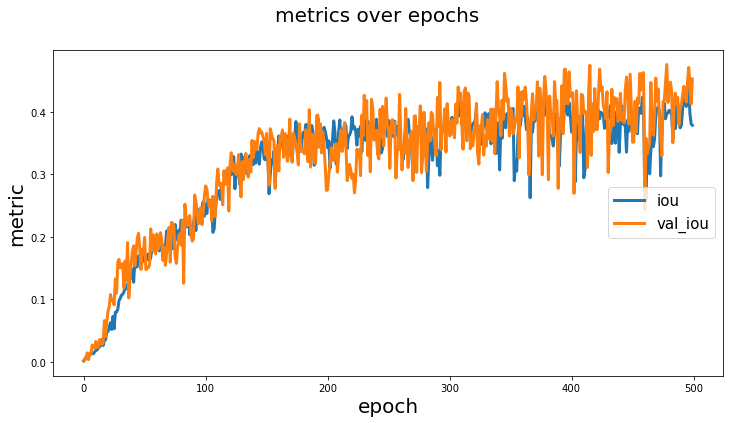

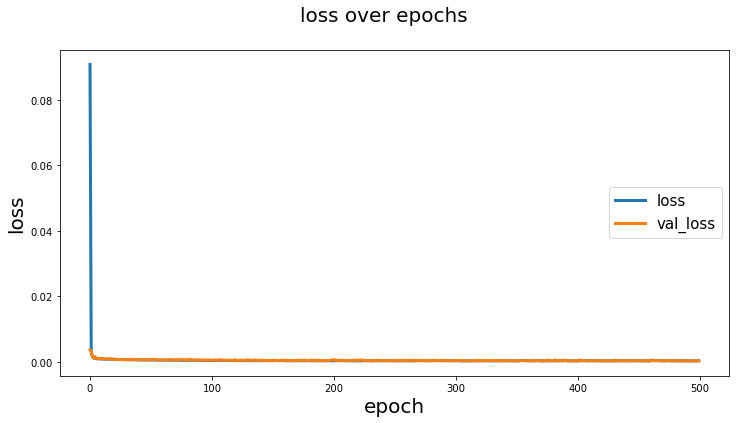

In [20]:
C.Helper.visualize_graph(history)

In [21]:
y_pred = C.Helper.prediction(test_images_array, model)

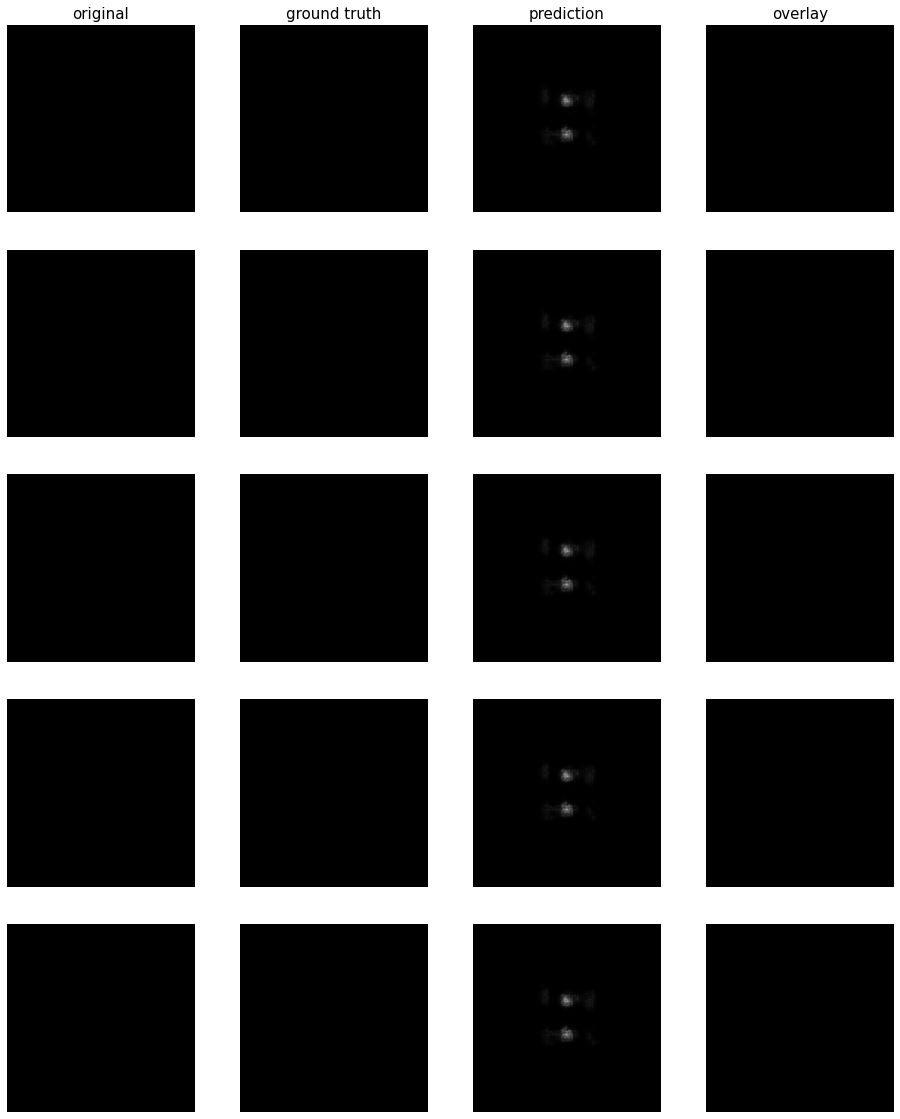

In [22]:
C.Helper.visualize_result(test_images_array, y_test, y_pred)

In [23]:
C.Helper.evaluate(test_images_array, y_test, model)

105/105 [==============================] - 47s 445ms/step - loss: 7.1071e-05 - iou: 0.0626 - iou_thresholded: 0.6102
